# TP2 - Problema 1

### Grupo 11

Nelson Almeida a95652
<br>
Nuno Costa a97610

Um  programa imperativo pode ser descrito por um modelo do tipo Control Flow Automaton (CFA) como ilustrado no exemplo seguinte
<br>
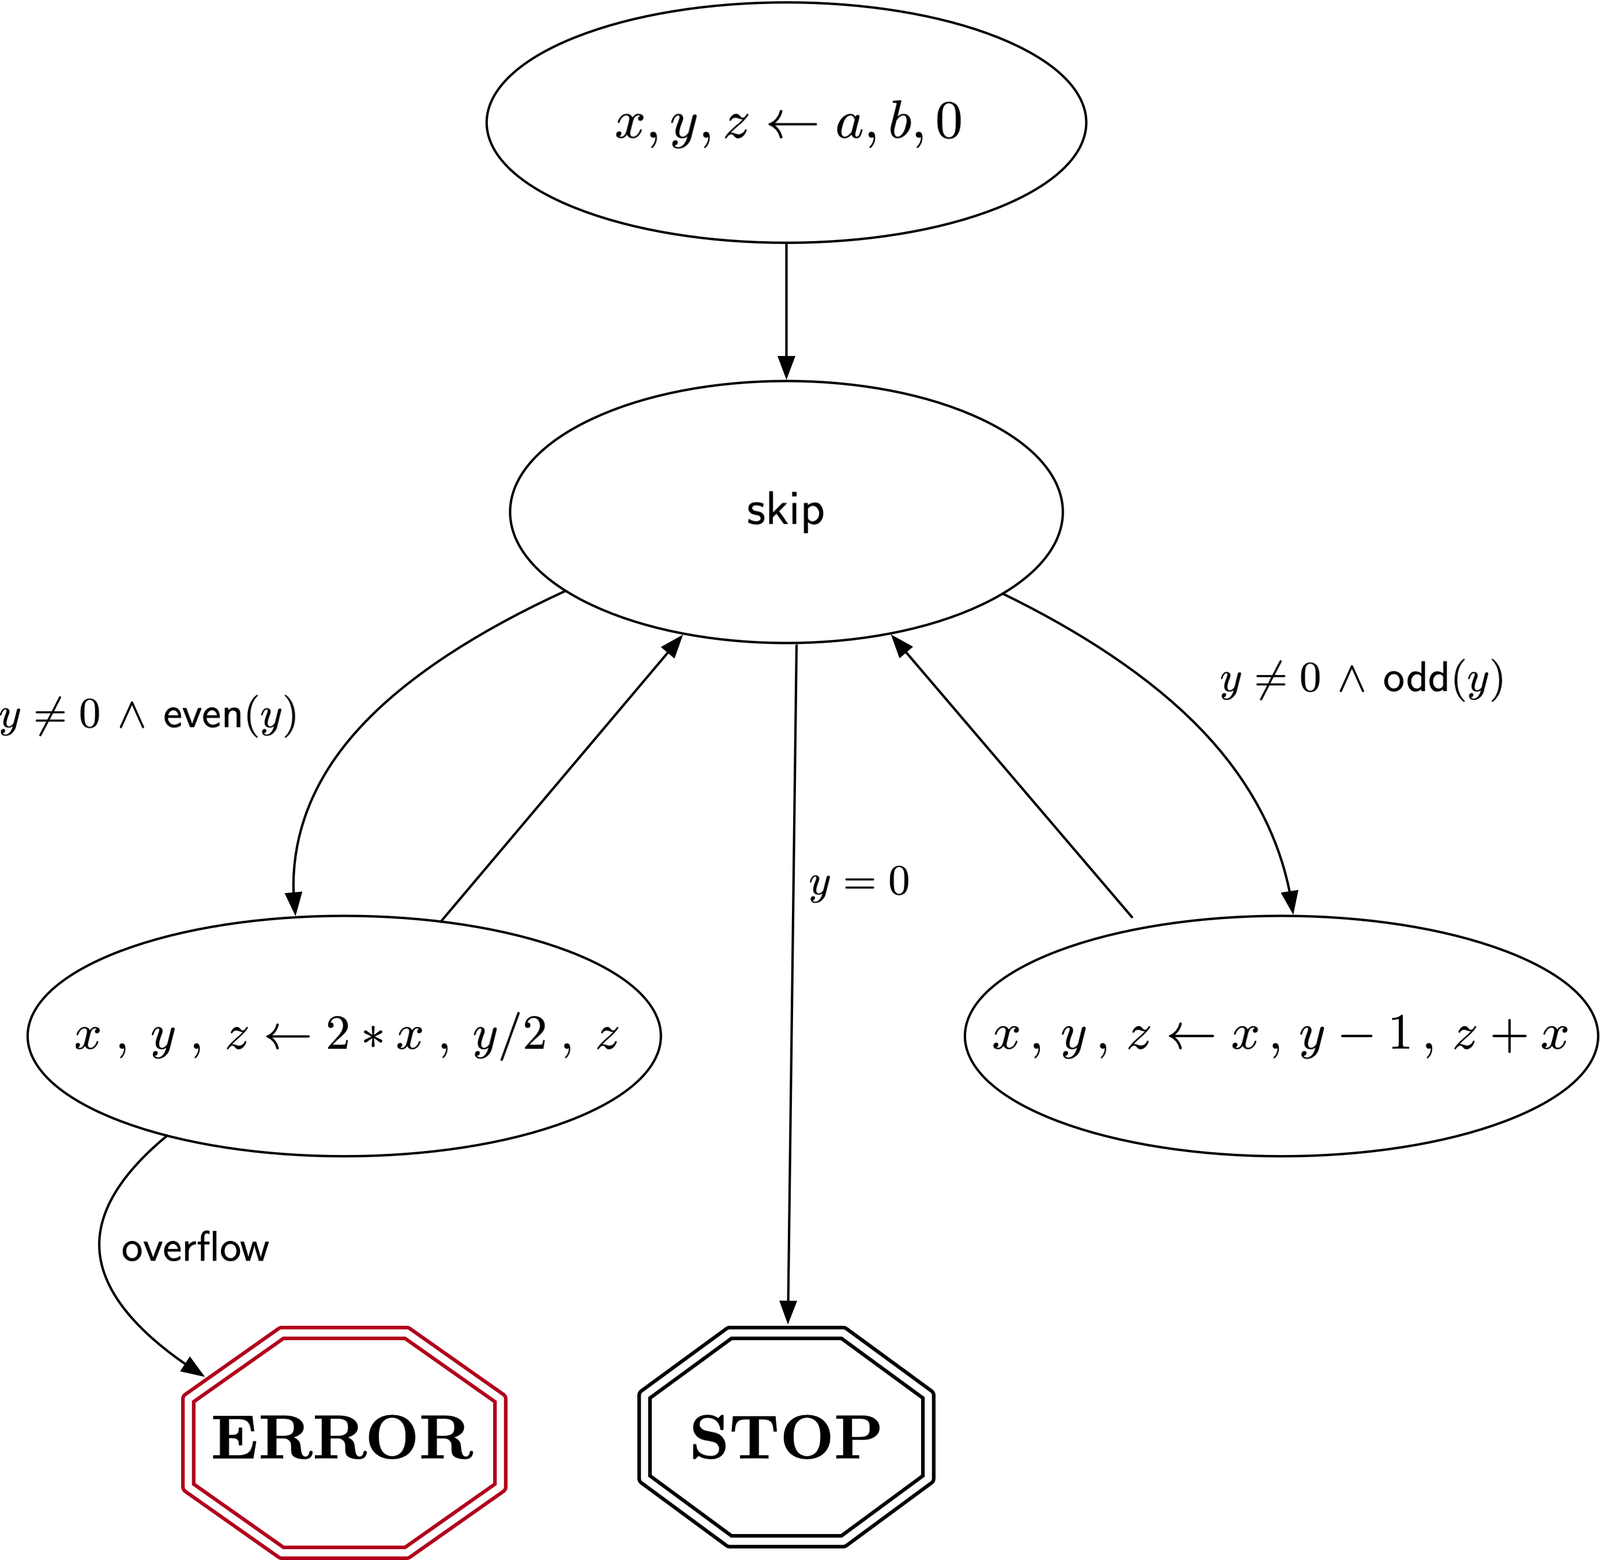
<br>
Este programa implementa a multiplicação de dois inteiros $\,a,b\,$ , fornecidos como “input”,    e com precisão limitada a $\,n\,$ bits (fornecido como parâmetro do programa). Note-se que
- Existe a possibilidade de alguma das operações do programa produzir um erro de “overflow”. 
- Os nós do grafo representam ações  que actuam sobre os “inputs” do nó e produzem um “output” com as operações indicadas.
- Os ramos do grafo representam ligações que transferem o “output” de um nodo para o “input” do nodo seguinte. Esta transferência é condicionada pela satisfação da condição associada ao ramo.


a. Construa um FOTS usando BitVector de tamanho $n$ que descreva o comportamento deste autómato. Para isso identifique as variáveis do modelo, o estado inicial e a relação de transição.

b. Verifique se$\;$ $\;\mathsf{P}\,\equiv\,(x*y + z = a*b)\;$ $\;$é um invariante deste comportamento.

### Inicialização
Começamos por importar o módulo `pysmt.shortcuts` que disponibiliza as funcionalidades para a utilização usual de um SMTsolver. Os tipos estão definidos no módulo `pysmt.typing` de onde temos que importar o tipo INT.

In [1]:
from pysmt.shortcuts import *
from pysmt.typing import INT

### Modelação de predicados
O estado inicial é caracterizado pelo seguinte predicado:

$$ node = 0 \land z = 0 $$

##### Nota: 
Estado atual = node <br> Estado seguinte = node' 

As transições possíveis são caracterizadas pelo seguinte predicado:

$$ node = 0 \land (\,y \neq 0 \land even(y)\,) \land node' = 1 \land x' = x \land y' = y \land z' = z $$

$$ \lor $$

$$ node = 0 \land y = 0 \land node' = 2 \land x' = x \land y' = y \land z' = z $$

$$ \lor $$

$$ node = 0 \land (\,y \neq 0 \land odd(y)\,) \land node' = 3 \land x' = x \land y' = y \land z' = z $$

$$ \lor $$

$$ node = 1 \land node' = 0 \land x = 2 * x \land y = y / 2 \land z = z $$

$$ \lor $$

$$ node = 3 \land node' = 0 \land x' = x \land y' = y - 1 \land z' = z + x $$ 

$$ \lor $$

$$ node = 1 \land node' = 4 \land overflow \land x' = x \land y' = y \land z' = z $$

$$ \lor $$

$$ node = 4 \land node' = 4 \land x' = x \land y' = y \land z' = z $$

$$ \lor $$

$$ node = 2 \land node' = 2 \land x' = x \land y' = y \land z' = z $$

A seguinte função cria a i-ésima cópia das variáveis de estado, agrupadas num dicionário que nos permite aceder às mesmas.

In [2]:
def declare(i):
    state = {}
    
    # definir variáveis
    state['node'] = Symbol('node' + str(i), INT)
    state['x'] = Symbol('x' + str(i), INT)
    state['y'] = Symbol('y' + str(i), INT)
    state['z'] = Symbol('z' + str(i), INT)
    
    return state

 Função que testa se esse estado é um possível estado inicial do programa.

In [3]:
def init(state):
    return And(Equals(state['node'], Int(0)), Equals(state['z'], Int(0)))

Função que dados dois possíveis estados do programa, testa se é possível transitar do primeiro para o segundo.

In [ ]:
def even(num):
    return num % 2 == 0

def odd(num):
    return num % 2 != 0

def trans(atual, prox):
    # 𝑛𝑜𝑑𝑒=0∧(𝑦≠0∧𝑒𝑣𝑒𝑛(𝑦))∧𝑛𝑜𝑑𝑒′=1∧𝑥′=𝑥∧𝑦′=𝑦∧𝑧′=𝑧
    t0 = And(
        Equals(atual['node'], Int(0)),
        NotEquals(atual['y'], Int(0)),
        even(y),
        Equals(prox['node'], Int(1)),
        Equals(prox['x'], atual['x']),
        Equals(prox['y'], atual['y']),
        Equals(prox['z'], atual['z']),
    )
    
    # 𝑛𝑜𝑑𝑒=0∧𝑦=0∧𝑛𝑜𝑑𝑒′=2∧𝑥′=𝑥∧𝑦′=𝑦∧𝑧′=𝑧
    t1 = And(
        Equals(atual['node'], Int(0)),
        Equals(atual['y'], Int(0)),
        Equals(prox['node'], Int(2)),
        Equals(prox['x'], atual['x']),
        Equals(prox['y'], atual['y']),
        Equals(prox['z'], atual['z']),
    )
    
    # 𝑛𝑜𝑑𝑒=0∧(𝑦≠0∧𝑜𝑑𝑑(𝑦))∧𝑛𝑜𝑑𝑒′=3∧𝑥′=𝑥∧𝑦′=𝑦∧𝑧′=𝑧
    t2 = And(
        Equals(atual['node'], Int(0)),
        NotEquals(atual['y'], Int(0)),
        odd(y),
        Equals(prox['node'], Int(3)),
        Equals(prox['x'], atual['x']),
        Equals(prox['y'], atual['y']),
        Equals(prox['z'], atual['z']),
    )
    
    # 𝑛𝑜𝑑𝑒=1∧𝑛𝑜𝑑𝑒′=0∧𝑥=2∗𝑥∧𝑦=𝑦/2∧𝑧=𝑧
    t3 = And(
        Equals(atual['node'], Int(1)),
        Equals(prox['node'], Int(0)),
        Equals(prox['x'], atual['x'] * 2),
        Equals(prox['y'], atual['y'] / 2),
        Equals(prox['z'], atual['z']),
    )
    
    # 𝑛𝑜𝑑𝑒=3∧𝑛𝑜𝑑𝑒′=0∧𝑥′=𝑥∧𝑦′=𝑦−1∧𝑧′=𝑧+𝑥
    t4 = And(
        Equal(atual['node'], Int(3)),
        Equals(prox['node'], Int(0)),
        Equals(prox['x'], atual['x']),
        Equals(prox['y'], atual['y'] - 1),
        Equals(prox['z'], atual['z'] + atual['x']),
    )
    
    # 𝑛𝑜𝑑𝑒=1∧𝑛𝑜𝑑𝑒′=4∧𝑜𝑣𝑒𝑟𝑓𝑙𝑜𝑤∧𝑥′=𝑥∧𝑦′=𝑦∧𝑧′=𝑧
    t5 = And(
        Equal(atual['node'], Int(1)),
        Equal(prox['node'], Int(4)),
        overflow(),
        Equals(prox['x'], atual['x']),
        Equals(prox['y'], atual['y']),
        Equals(prox['z'], atual['z']),
    )
    
    # 𝑛𝑜𝑑𝑒=4∧𝑛𝑜𝑑𝑒′=4∧𝑥′=𝑥∧𝑦′=𝑦∧𝑧′=𝑧
    t6 = And(
        Equal(atual['node'], Int(4)),
        Equal(prox['node'], Int(4)),
        Equals(prox['x'], atual['x']),
        Equals(prox['y'], atual['y']),
        Equals(prox['z'], atual['z']),
    )
    
    # 𝑛𝑜𝑑𝑒=2∧𝑛𝑜𝑑𝑒′=2∧𝑥′=𝑥∧𝑦′=𝑦∧𝑧′=𝑧
    t7 = And(
        Equal(atual['node'], Int(2)),
        Equal(prox['node'], Int(2)),
        Equals(prox['x'], atual['x']),
        Equals(prox['y'], atual['y']),
        Equals(prox['z'], atual['z']),
    )